In [31]:
# Imports
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import notebook
import seaborn as sns

import importlib
import msciLib
importlib.reload(msciLib)

<module 'msciLib' from '/Users/melissawilson/git/msci_ml/workspace/msciLib.py'>

## Mean Absolute Percentage Error Computation

This notebook intends to calculate the mean absolute percentage error (MAPE) for our cleaned dataset 'matrix_3201'. To calculate the MAPE, we simply set the forcasted value as the previous day's value. 

### Formula

$$M = \frac {100\%} {n} \sum_{t = 1}^{n}  \left| \frac { A_t - F_t } {A_t} \right| $$

## Import Dataset

In [3]:
# Import Data
matrix_3201 = np.load("formatted_data/matrix_3201.npy")
tickers_3201 = np.load("formatted_data/tickers_3201.npy")

In [4]:
matrix_3201.shape

(3201, 9135)

## Calculate all MAPE's

In [42]:
# Construct array that will hold the MAPE for every variable for every ticker
mape = np.zeros(9135)

In [43]:
# for each ticker
for ticker_index in notebook.tqdm(range(len(tickers_3201))): 
    
    # for each variable
    for variable_index in range(5):
        
        # Grab all values except the first example.
        actual_values = matrix_3201[1:, ticker_index * 5 + variable_index]
        
        # Grab all values except the last example.
        forcasted_values = matrix_3201[0:-1, ticker_index * 5 + variable_index]
        
        # Calculate mape and store it.
        mape[ticker_index * 5 + variable_index] = msciLib.calculate_mape(actual_values, forcasted_values)
    

In [44]:
np.average(mape)

4187713.6294620526

## Why is this so large?

This is because the Volume variable is creating very large MAPE's for some tickers.

In [69]:
print("Maxiumum MAPE computed: {}".format(max(mape)))
print("Minimum MAPE computed: {}".format(min(mape)))

Maxiumum MAPE computed: 22493937542.577713
Minimum MAPE computed: 0.05641160466379391


In [70]:
outlier_indexes = np.where(mape >= 100)[0]

In [71]:
outlier_indexes / 5

array([ 232.8,  418.8,  501.8,  504.8,  557.8,  560.8,  561.8,  563.8,
        620. ,  620.4,  660.8,  803.8,  804.8,  806.8,  829.8,  834.8,
        846.8,  854.8,  855.8,  870.4,  873.8,  874.8,  875.8,  876.8,
        878.8,  881.8,  884.8,  905.8,  906.8, 1023.8, 1039.8, 1093.8,
       1144.8, 1233.8, 1245.8, 1329.8, 1350.8, 1378.8, 1398.8, 1462.8,
       1491.8, 1595.8, 1603.8, 1661.8, 1686.4, 1716.8])

In [72]:
np.array([msciLib.index_to_variable(ticker) for ticker in (outlier_indexes % 5)]) # All except on of these is the Volume attribute.

array(['volume', 'volume', 'volume', 'volume', 'volume', 'volume',
       'volume', 'volume', 'open', 'low', 'volume', 'volume', 'volume',
       'volume', 'volume', 'volume', 'volume', 'volume', 'volume', 'low',
       'volume', 'volume', 'volume', 'volume', 'volume', 'volume',
       'volume', 'volume', 'volume', 'volume', 'volume', 'volume',
       'volume', 'volume', 'volume', 'volume', 'volume', 'volume',
       'volume', 'volume', 'volume', 'volume', 'volume', 'volume', 'low',
       'volume'], dtype='<U6')

### MAPE for just close

In [73]:
mape_close = mape[np.where(np.arange(len(mape)) % 4 == 3)]

In [78]:
np.average(mape_close)
# np.std(mape_close)

11.15295904626992

In [75]:
mape_close

array([1.54736043, 1.59477145, 1.15889053, ..., 0.79844294, 2.2677469 ,
       0.52818929])

## Analysis of distribution of MAPE

### Outliers, MAPE >= 100

<function matplotlib.pyplot.show(*args, **kw)>

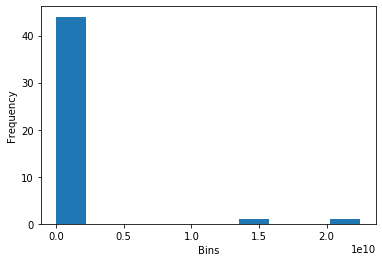

In [76]:
outlier_indexes = np.where(mape >= 100)[0]
plt.hist(mape[outlier_indexes])
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.ylim(0, 2)
plt.show

### MAPE <= 100

<function matplotlib.pyplot.show(*args, **kw)>

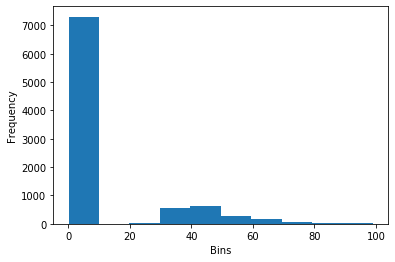

In [77]:
indexes = np.where(mape < 100)[0]
plt.hist(mape[indexes])
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.show